#**Process Analysis** en **Time Series Analysis** BPIC2011

In [41]:
!pip install pm4py DyLoPro pandas numpy matplotlib seaborn


In [42]:
from google.colab import files
import pandas as pd
import pm4py

# Upload de dataset handmatig
uploaded = files.upload()


Saving hospital_behavior_results_corrected.csv to hospital_behavior_results_corrected (1).csv


In [43]:
# 1. Laad de dataset
df_wt = pd.read_csv("hospital_behavior_results_corrected.csv", parse_dates=["timestamp_i", "timestamp_j"])
df_wt.head()


,case_id,event_i,timestamp_i,event_j,timestamp_j,actor_i,actor_j,behavior,delta_t,operation_performed
0,1000,1e consult poliklinisch,2007-07-19 23:00:00+00:00,administratief tarief - eerste pol,2007-07-19 23:00:00+00:00,Obstetrics & Gynaecology clinic,Obstetrics & Gynaecology clinic,C,0.0,False
1,1000,administratief tarief - eerste pol,2007-07-19 23:00:00+00:00,telefonisch consult,2007-10-18 23:00:00+00:00,Obstetrics & Gynaecology clinic,Obstetrics & Gynaecology clinic,C,7862400.0,False
2,1000,telefonisch consult,2007-10-18 23:00:00+00:00,vervolgconsult poliklinisch,2007-10-21 23:00:00+00:00,Obstetrics & Gynaecology clinic,Obstetrics & Gynaecology clinic,C,259200.0,False
3,1001,e.c.g. - elektrocardiografie,2007-07-23 23:00:00+00:00,aanname laboratoriumonderzoek,2007-07-23 23:00:00+00:00,General Lab Clinical Chemistry,General Lab Clinical Chemistry,C,0.0,True
4,1001,aanname laboratoriumonderzoek,2007-07-23 23:00:00+00:00,aanname laboratoriumonderzoek,2007-07-23 23:00:00+00:00,General Lab Clinical Chemistry,General Lab Clinical Chemistry,C,0.0,True


In [44]:
import io
import pandas as pd

# Automatisch de bestandsnaam pakken
filename = next(iter(uploaded))

# Lees de CSV in
df = pd.read_csv(io.BytesIO(uploaded[filename]))

# Bekijk kolommen
print(df.columns)


Index(['case_id', 'event_i', 'timestamp_i', 'event_j', 'timestamp_j',
       'actor_i', 'actor_j', 'behavior', 'delta_t', 'operation_performed'],
      dtype='object')


In [45]:
#correcte kolomnamen toewijzen voor DyLoPro
df_wt.rename(columns={"case_id": "case:concept:name",
                       "event_i": "concept:name",
                       "timestamp_i": "time:timestamp",
                      "operation_performed":"operation_performed"}, inplace=True)
df_wt.head()


,case:concept:name,concept:name,time:timestamp,event_j,timestamp_j,actor_i,actor_j,behavior,delta_t,operation_performed
0,1000,1e consult poliklinisch,2007-07-19 23:00:00+00:00,administratief tarief - eerste pol,2007-07-19 23:00:00+00:00,Obstetrics & Gynaecology clinic,Obstetrics & Gynaecology clinic,C,0.0,False
1,1000,administratief tarief - eerste pol,2007-07-19 23:00:00+00:00,telefonisch consult,2007-10-18 23:00:00+00:00,Obstetrics & Gynaecology clinic,Obstetrics & Gynaecology clinic,C,7862400.0,False
2,1000,telefonisch consult,2007-10-18 23:00:00+00:00,vervolgconsult poliklinisch,2007-10-21 23:00:00+00:00,Obstetrics & Gynaecology clinic,Obstetrics & Gynaecology clinic,C,259200.0,False
3,1001,e.c.g. - elektrocardiografie,2007-07-23 23:00:00+00:00,aanname laboratoriumonderzoek,2007-07-23 23:00:00+00:00,General Lab Clinical Chemistry,General Lab Clinical Chemistry,C,0.0,True
4,1001,aanname laboratoriumonderzoek,2007-07-23 23:00:00+00:00,aanname laboratoriumonderzoek,2007-07-23 23:00:00+00:00,General Lab Clinical Chemistry,General Lab Clinical Chemistry,C,0.0,True


In [46]:
print(df_wt.head())  # Check the first few rows of the DataFrame
print(df_wt.columns)  # Ensure column names are correct


   case:concept:name                              concept:name  \
0               1000                   1e consult poliklinisch   
1               1000  administratief tarief       - eerste pol   
2               1000                       telefonisch consult   
3               1001         e.c.g.      - elektrocardiografie   
4               1001             aanname laboratoriumonderzoek   

             time:timestamp                                   event_j  \
0 2007-07-19 23:00:00+00:00  administratief tarief       - eerste pol   
1 2007-07-19 23:00:00+00:00                       telefonisch consult   
2 2007-10-18 23:00:00+00:00               vervolgconsult poliklinisch   
3 2007-07-23 23:00:00+00:00             aanname laboratoriumonderzoek   
4 2007-07-23 23:00:00+00:00             aanname laboratoriumonderzoek   

                timestamp_j                          actor_i  \
0 2007-07-19 23:00:00+00:00  Obstetrics & Gynaecology clinic   
1 2007-10-18 23:00:00+00:00  Obstetr

#How many cases per behavior type

timestamp_i    datetime64[ns, UTC]
timestamp_j    datetime64[ns, UTC]
dtype: object
timestamp_i    0
behavior       0
dtype: int64


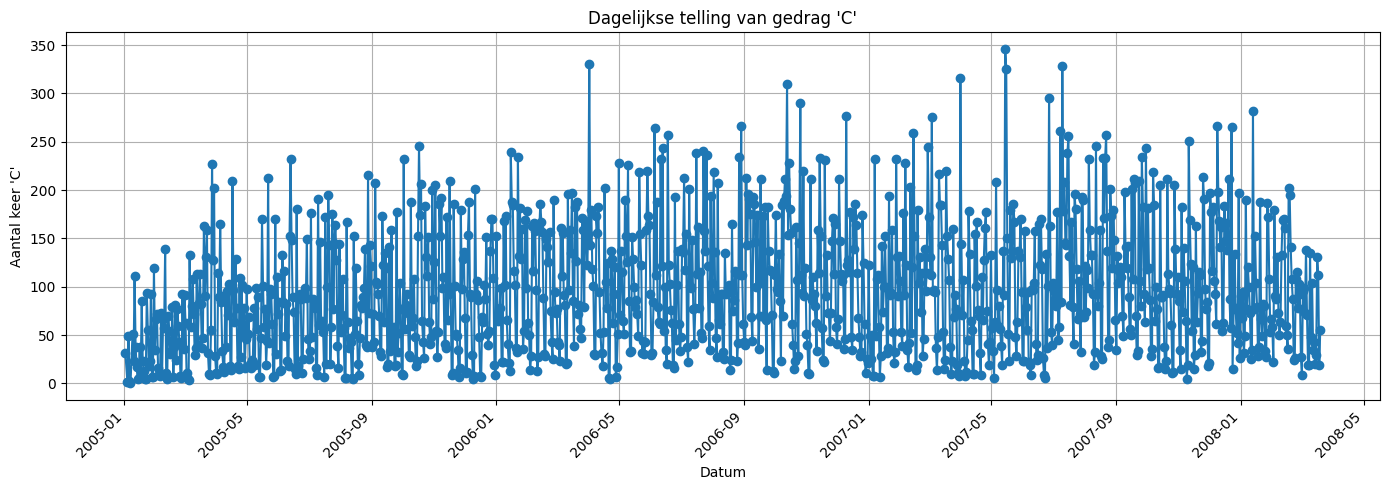

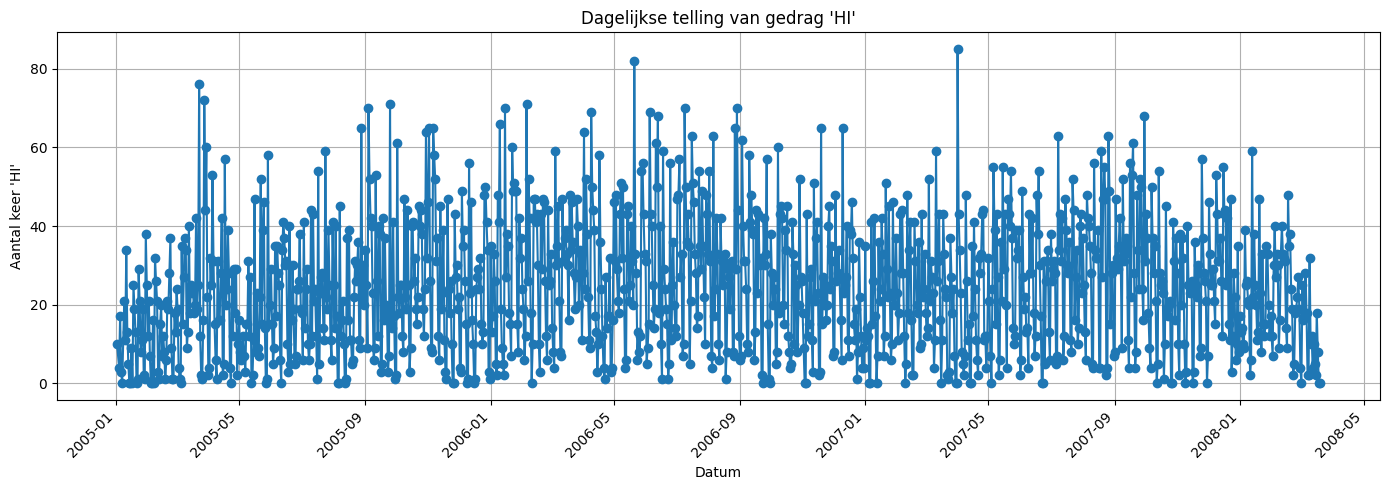

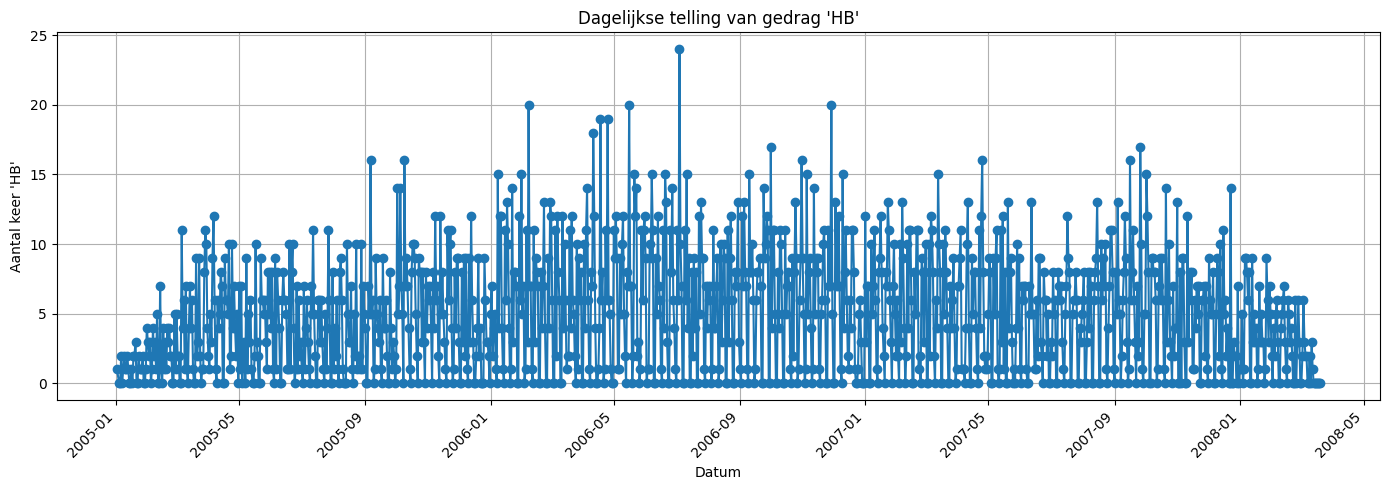

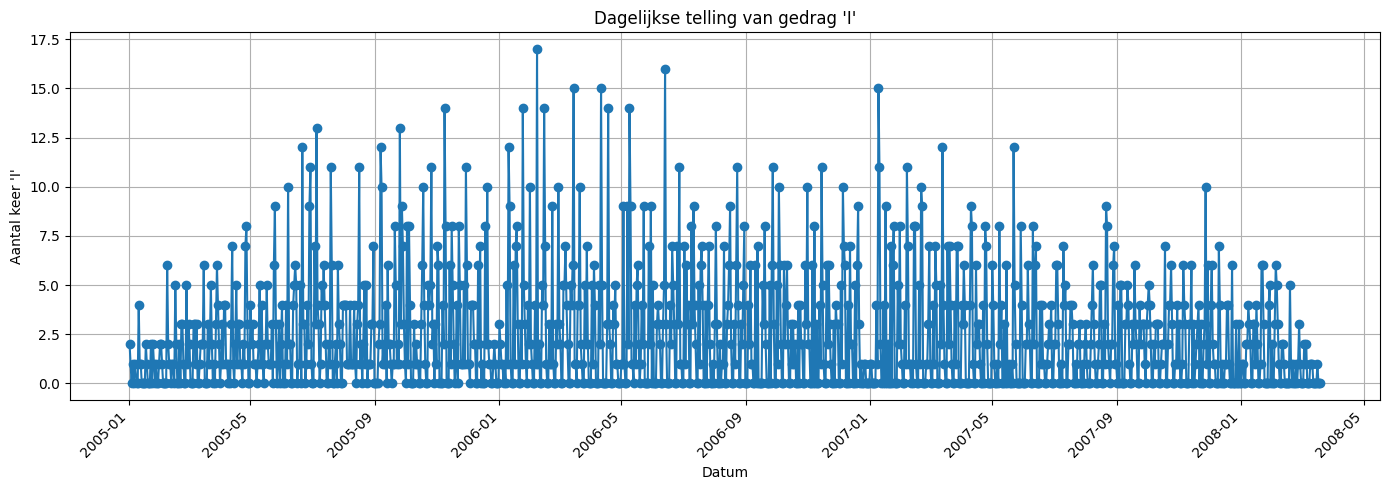

In [47]:
import pandas as pd
import matplotlib.pyplot as plt

# Zet timestamps om naar datetime
df['timestamp_i'] = pd.to_datetime(df['timestamp_i'], errors='coerce', utc=True)
df['timestamp_j'] = pd.to_datetime(df['timestamp_j'], errors='coerce', utc=True)

# Controleer parsing & missende data
print(df[['timestamp_i', 'timestamp_j']].dtypes)
print(df[['timestamp_i', 'behavior']].isna().sum())

# 🔁 Groepeer per dag i.p.v. per week
behavior_daily = df.groupby([
    df['timestamp_i'].dt.floor('D'),
    'behavior'
]).size().unstack(fill_value=0)

# 🎯 Top 4 gedragstypes
top_behaviors = df['behavior'].value_counts().head(4).index.tolist()

# 📈 Visualisatie per dag
for behavior in top_behaviors:
    plt.figure(figsize=(14, 5))
    behavior_daily[behavior].plot(marker='o')
    plt.title(f"Dagelijkse telling van gedrag '{behavior}'")
    plt.xlabel("Datum")
    plt.ylabel(f"Aantal keer '{behavior}'")
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()



Time Series generation for granger

In [48]:
all_series = []
# Stap 2: Algemene time series voor alle data
behavior_daily = df_wt.groupby([
    df_wt['time:timestamp'].dt.floor('D'),
    'behavior'
]).size().unstack(fill_value=0)

top_behaviors = df_wt['behavior'].value_counts().head(4).index.tolist()

for behavior in top_behaviors:
    if behavior in behavior_daily.columns:
        s = behavior_daily[behavior].rename(f"All_{behavior}")
        all_series.append(s)

# Stap 5: Combineer alles
df_all = pd.concat(all_series, axis=1).sort_index()
df_all = df_all.fillna(0)

# Resultaat bekijken
print(df_all.shape)
df_all.head()



(1171, 4)


,All_C,All_HI,All_HB,All_I
time:timestamp,,,,
2005-01-02 00:00:00+00:00,31,10,1,2
2005-01-04 00:00:00+00:00,1,4,0,0
2005-01-05 00:00:00+00:00,49,17,0,1
2005-01-06 00:00:00+00:00,2,3,2,0
2005-01-07 00:00:00+00:00,0,0,0,1


#Fraction and Duration of a case per outcome (operation_performed True or False)


Preprocessing the data...


/usr/local/lib/python3.11/dist-packages/DyLoPro/preprocess_utils.py:105: UserWarning: In some cases in the given log, the events were not ordered correctly based on their timestamp. In the DynamicLogPlots instance' internal representation of the log, this problem is resolved by correctly sorting the events.
  warnings.warn(warning_message)
/usr/local/lib/python3.11/dist-packages/cudf/pandas/fast_slow_proxy.py:28: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return fn(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/cudf/pandas/fast_slow_proxy.py:28: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return fn(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/cudf/pandas/fast_slow_proxy.py:28: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return fn(*args, **kwargs)
100%|██████████| 149147/149147 [00:08<00:00, 17459.7

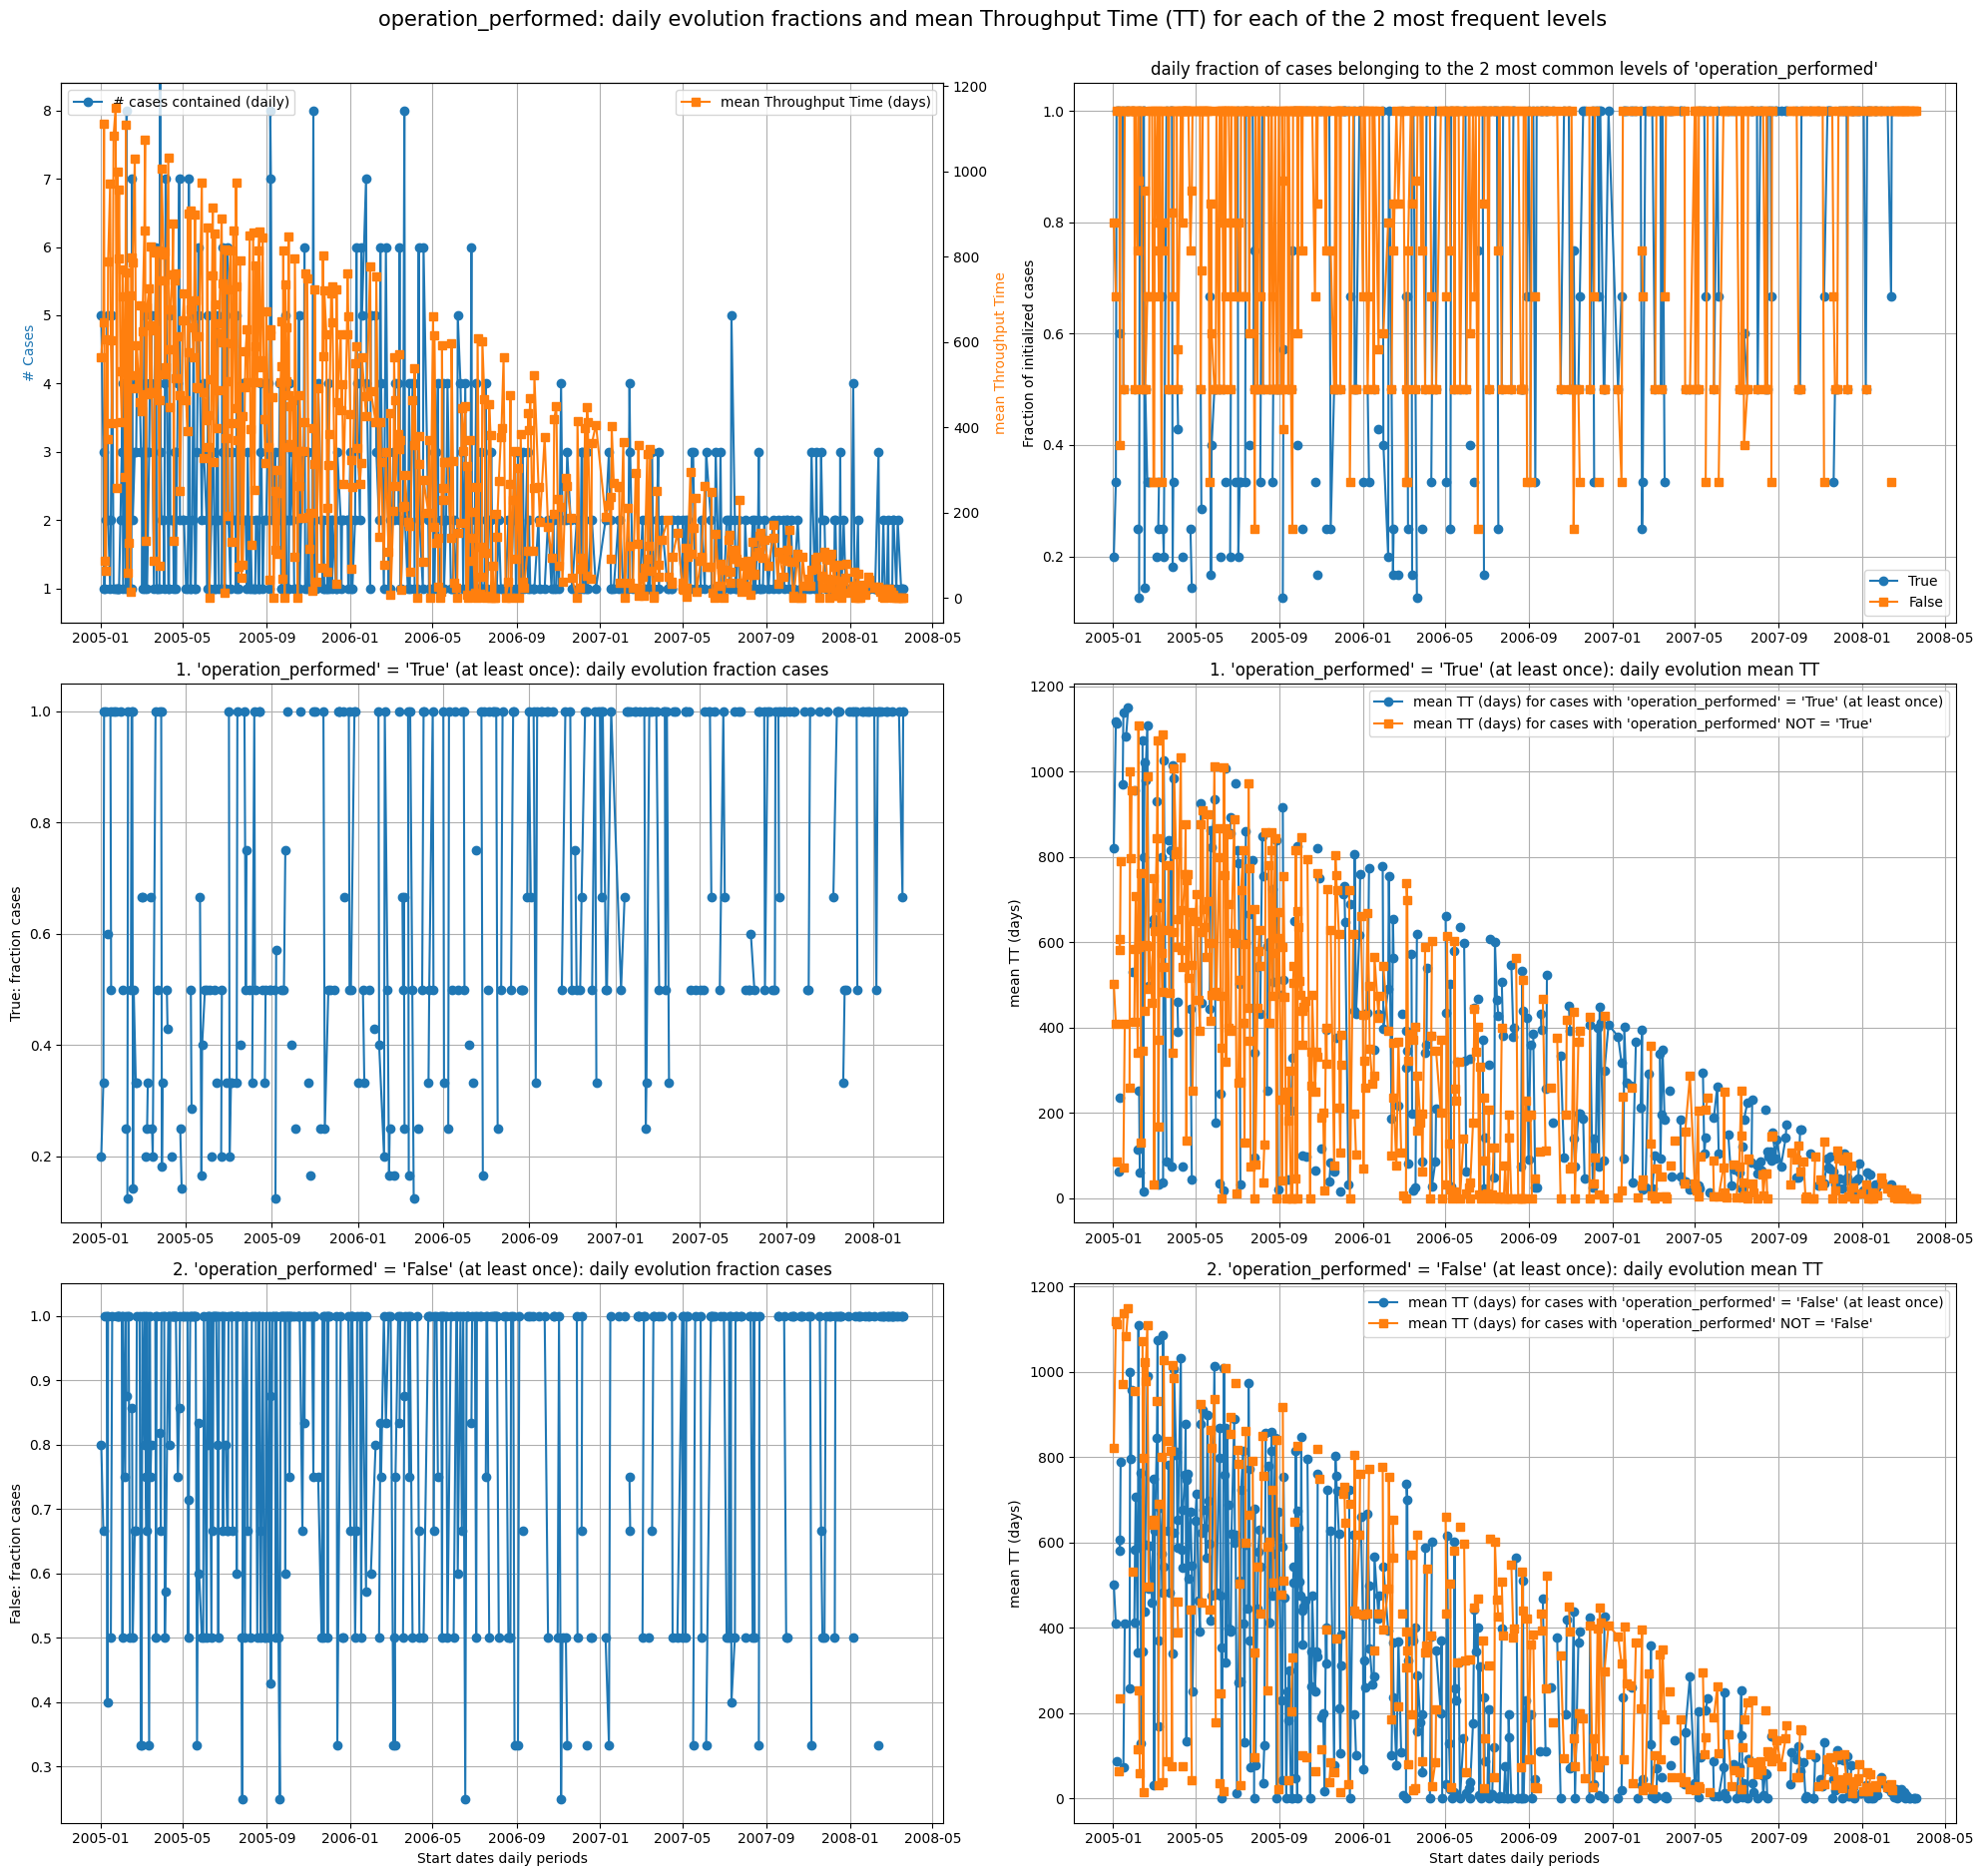

In [ ]:
import pandas as pd
from DyLoPro import DynamicLogPlots

# Zet timestamp naar datetime en Accepted naar categorisch
df_wt['time:timestamp'] = pd.to_datetime(df_wt['time:timestamp'])

# Initialiseer DyLoPro met correcte dataframe
dlp = DynamicLogPlots(
    event_log=df_wt,
    case_id_key='case:concept:name',
    activity_key='concept:name',
    timestamp_key='time:timestamp',
    categorical_eventfeatures=['operation_performed']
)
#fraction of cases with at least one of the 4 actor behavior types + duration of the cases with at least one of these 4 behavior types
dlp.topK_categorical_eventftr_evol(
    event_feature='operation_performed',
    frequency='daily',
    plt_type='type_tt',
    numeric_agg='mean',
    max_k=4,
    xtr_outlier_rem=True)


Time Series generation for granger

In [49]:
# Zorg dat timestamps datetime zijn
df_wt['time:timestamp'] = pd.to_datetime(df_wt['time:timestamp'])

# Bereken start- en eindtijd per case, met outcome
case_durations = df_wt.groupby('case:concept:name').agg(
    start=('time:timestamp', 'min'),
    end=('time:timestamp', 'max'),
    outcome=('operation_performed', 'first')
)

# Bereken duur in uren
case_durations['duration'] = (case_durations['end'] - case_durations['start']).dt.total_seconds() / 3600

# Startdag bepalen
case_durations['start_day'] = case_durations['start'].dt.to_period('D').apply(lambda r: r.start_time)

# Totaal aantal cases per dag
total_per_day = case_durations.groupby('start_day').size()

# Aantal cases per outcome per dag
outcome_counts = case_durations.groupby(['start_day', 'outcome']).size().unstack(fill_value=0)

# Fracties per outcome per dag
outcome_fractions = outcome_counts.divide(total_per_day, axis=0)
outcome_fractions.columns = [f"fraction_{col}" for col in outcome_fractions.columns]

# 🔄 Gemiddelde duur van alle cases per dag (ongeacht outcome)
avg_duration = case_durations.groupby('start_day')['duration'].mean().rename("avg_duration")

# Combineer alles
df_outcome_series = pd.concat([outcome_fractions, avg_duration], axis=1).sort_index().fillna(0)

# Resultaat bekijken
print(df_outcome_series.shape)
df_outcome_series.head()


(550, 3)


/usr/local/lib/python3.11/dist-packages/cudf/pandas/fast_slow_proxy.py:28: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  return fn(*args, **kwargs)


,fraction_False,fraction_True,avg_duration
start_day,,,
2005-01-02,0.800000,0.200000,13560.0
2005-01-05,0.666667,0.333333,15488.0
2005-01-06,0.000000,1.000000,26688.0
2005-01-07,1.000000,0.000000,2064.0
2005-01-09,0.000000,1.000000,1524.0


In [50]:
# Zorg dat beide indices datetime zijn én tz-aware (UTC)
df_all.index = pd.to_datetime(df_all.index, utc=True).floor("D")
df_outcome_series.index = pd.to_datetime(df_outcome_series.index, utc=True).floor("D")

# Combineer de tijdindexen (op uurniveau)
all_hours = df_all.index.union(df_outcome_series.index).sort_values()

# Reindex beide dataframes op de uurlijkse index
df_all = df_all.reindex(all_hours).fillna(0)
df_outcome_series = df_outcome_series.reindex(all_hours).fillna(0)

# Combineer gedrag + uitkomst
df_all_combined = pd.concat([df_all, df_outcome_series], axis=1)

# Controleer laatste kolommen
print(df_all_combined.columns[-6:])

# Exporteer naar CSV
df_all_combined.to_csv("df_all_combined_bpic2011.csv")

# Download in Colab
from google.colab import files
files.download("df_all_combined_bpic2011.csv")



Index(['All_HI', 'All_HB', 'All_I', 'fraction_False', 'fraction_True',
       'avg_duration'],
      dtype='object')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#Granger Causalities

In [51]:
#inlezen csv
from google.colab import files
uploaded = files.upload()


Saving df_all_combined_bpic2011.csv to df_all_combined_bpic2011 (1).csv


In [53]:
import io
import pandas as pd

# Inlezen van het bestand
df_all_combined = pd.read_csv(io.BytesIO(uploaded['df_all_combined_bpic2011 (1).csv']))


In [55]:
from statsmodels.tsa.stattools import grangercausalitytests, adfuller
import pandas as pd

# Functies
def is_stationary(series, alpha=0.05):
    """Check stationariteit via ADF-test."""
    result = adfuller(series.dropna())
    return result[1] < alpha

def make_stationary(series):
    """Eerste verschil nemen om stationair te maken."""
    return series.diff()

def print_adf_result(series, name, alpha=0.05):
    """Print ADF-statistieken."""
    series = series.dropna()
    result = adfuller(series)
    test_stat, p_value, lags, n_obs, crit_values, _ = result

    print(f"\n🔍 ADF Test voor '{name}':")
    print(f" - Teststatistiek: {test_stat:.4f}")
    print(f" - p-waarde: {p_value:.4f}")
    for key, val in crit_values.items():
        print(f" - Kritieke waarde ({key}): {val:.4f}")
    if p_value < alpha:
        print(" ✅ Stationair")
    else:
        print(" ❌ Niet-stationair → wordt gedifferentieerd")

# Kolommen
X_columns = ['All_C', 'All_HB', 'All_HI', 'All_I']
Y_columns = ['fraction_True', 'avg_duration']
max_lag = 3

# Voor het bewaren van stationaire series
stationary_df = pd.DataFrame(index=df_all_combined.index)

# Granger resultaten opslaan
results = []

# Loop door combinaties
for x in X_columns:
    for y in Y_columns:
        try:
            data = df_all_combined[[x, y]].dropna()

            # ADF printen
            print_adf_result(data[x], name=x)
            print_adf_result(data[y], name=y)

            # Stationaire reeksen toevoegen
            stationary_df[x] = make_stationary(data[x]) if not is_stationary(data[x]) else data[x]
            stationary_df[y] = make_stationary(data[y]) if not is_stationary(data[y]) else data[y]

            # Bereid data voor Granger test
            data_granger = stationary_df[[y, x]].dropna()

            test_result = grangercausalitytests(data_granger, maxlag=max_lag, verbose=False)
            p_values = [test_result[lag][0]['ssr_ftest'][1] for lag in range(1, max_lag + 1)]

        except Exception as e:
            print(f"⚠️ Fout bij combinatie {x} ➝ {y}: {e}")
            p_values = [None] * max_lag

        result = {'X (cause)': x, 'Y (effect)': y}
        for lag in range(1, max_lag + 1):
            result[f'p_lag{lag}'] = p_values[lag - 1]
        results.append(result)

# Resultaten als DataFrame
granger_df = pd.DataFrame(results)

# Bekijk resultaten
granger_df



🔍 ADF Test voor 'All_C':
 - Teststatistiek: -5.4622
 - p-waarde: 0.0000
 - Kritieke waarde (1%): -3.4361
 - Kritieke waarde (5%): -2.8641
 - Kritieke waarde (10%): -2.5681
 ✅ Stationair

🔍 ADF Test voor 'fraction_True':
 - Teststatistiek: -7.9873
 - p-waarde: 0.0000
 - Kritieke waarde (1%): -3.4360
 - Kritieke waarde (5%): -2.8640
 - Kritieke waarde (10%): -2.5681
 ✅ Stationair

🔍 ADF Test voor 'All_C':
 - Teststatistiek: -5.4622
 - p-waarde: 0.0000
 - Kritieke waarde (1%): -3.4361
 - Kritieke waarde (5%): -2.8641
 - Kritieke waarde (10%): -2.5681
 ✅ Stationair

🔍 ADF Test voor 'avg_duration':
 - Teststatistiek: -2.4658
 - p-waarde: 0.1240
 - Kritieke waarde (1%): -3.4361
 - Kritieke waarde (5%): -2.8641
 - Kritieke waarde (10%): -2.5681
 ❌ Niet-stationair → wordt gedifferentieerd


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(



🔍 ADF Test voor 'All_HB':
 - Teststatistiek: -3.0103
 - p-waarde: 0.0339
 - Kritieke waarde (1%): -3.4361
 - Kritieke waarde (5%): -2.8641
 - Kritieke waarde (10%): -2.5681
 ✅ Stationair

🔍 ADF Test voor 'fraction_True':
 - Teststatistiek: -7.9873
 - p-waarde: 0.0000
 - Kritieke waarde (1%): -3.4360
 - Kritieke waarde (5%): -2.8640
 - Kritieke waarde (10%): -2.5681
 ✅ Stationair

🔍 ADF Test voor 'All_HB':
 - Teststatistiek: -3.0103
 - p-waarde: 0.0339
 - Kritieke waarde (1%): -3.4361
 - Kritieke waarde (5%): -2.8641
 - Kritieke waarde (10%): -2.5681
 ✅ Stationair

🔍 ADF Test voor 'avg_duration':
 - Teststatistiek: -2.4658
 - p-waarde: 0.1240
 - Kritieke waarde (1%): -3.4361
 - Kritieke waarde (5%): -2.8641
 - Kritieke waarde (10%): -2.5681
 ❌ Niet-stationair → wordt gedifferentieerd


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(



🔍 ADF Test voor 'All_HI':
 - Teststatistiek: -4.6894
 - p-waarde: 0.0001
 - Kritieke waarde (1%): -3.4361
 - Kritieke waarde (5%): -2.8641
 - Kritieke waarde (10%): -2.5681
 ✅ Stationair

🔍 ADF Test voor 'fraction_True':
 - Teststatistiek: -7.9873
 - p-waarde: 0.0000
 - Kritieke waarde (1%): -3.4360
 - Kritieke waarde (5%): -2.8640
 - Kritieke waarde (10%): -2.5681
 ✅ Stationair

🔍 ADF Test voor 'All_HI':
 - Teststatistiek: -4.6894
 - p-waarde: 0.0001
 - Kritieke waarde (1%): -3.4361
 - Kritieke waarde (5%): -2.8641
 - Kritieke waarde (10%): -2.5681
 ✅ Stationair

🔍 ADF Test voor 'avg_duration':
 - Teststatistiek: -2.4658
 - p-waarde: 0.1240
 - Kritieke waarde (1%): -3.4361
 - Kritieke waarde (5%): -2.8641
 - Kritieke waarde (10%): -2.5681
 ❌ Niet-stationair → wordt gedifferentieerd


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(



🔍 ADF Test voor 'All_I':
 - Teststatistiek: -4.5181
 - p-waarde: 0.0002
 - Kritieke waarde (1%): -3.4360
 - Kritieke waarde (5%): -2.8641
 - Kritieke waarde (10%): -2.5681
 ✅ Stationair

🔍 ADF Test voor 'fraction_True':
 - Teststatistiek: -7.9873
 - p-waarde: 0.0000
 - Kritieke waarde (1%): -3.4360
 - Kritieke waarde (5%): -2.8640
 - Kritieke waarde (10%): -2.5681
 ✅ Stationair

🔍 ADF Test voor 'All_I':
 - Teststatistiek: -4.5181
 - p-waarde: 0.0002
 - Kritieke waarde (1%): -3.4360
 - Kritieke waarde (5%): -2.8641
 - Kritieke waarde (10%): -2.5681
 ✅ Stationair

🔍 ADF Test voor 'avg_duration':
 - Teststatistiek: -2.4658
 - p-waarde: 0.1240
 - Kritieke waarde (1%): -3.4361
 - Kritieke waarde (5%): -2.8641
 - Kritieke waarde (10%): -2.5681
 ❌ Niet-stationair → wordt gedifferentieerd


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


,X (cause),Y (effect),p_lag1,p_lag2,p_lag3
0,All_C,fraction_True,0.464762,0.402753,1.491481e-02
1,All_C,avg_duration,0.005667,0.088819,3.546481e-03
2,All_HB,fraction_True,0.281079,0.515097,1.092993e-04
3,All_HB,avg_duration,0.000017,0.001158,9.752073e-06
4,All_HI,fraction_True,0.651741,0.901380,7.593725e-02
5,All_HI,avg_duration,0.001069,0.017353,3.044827e-03
6,All_I,fraction_True,0.783082,0.274980,6.045189e-07
7,All_I,avg_duration,0.000200,0.000044,3.035940e-14


In [57]:
!pip install group-lasso

🔍 Lag-selectie over (group_reg, l1_reg):


/usr/local/lib/python3.11/dist-packages/group_lasso/_fista.py:114: ConvergenceWarning: The FISTA iterations did not converge to a sufficient minimum.
You used subsampling then this is expected, otherwise, try increasing the number of iterations or decreasing the tolerance.
  warnings.warn(


λg=0.1, λ1=0.0 → geselecteerde lags: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22]


/usr/local/lib/python3.11/dist-packages/group_lasso/_fista.py:114: ConvergenceWarning: The FISTA iterations did not converge to a sufficient minimum.
You used subsampling then this is expected, otherwise, try increasing the number of iterations or decreasing the tolerance.
  warnings.warn(


λg=0.1, λ1=0.1 → geselecteerde lags: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22]


/usr/local/lib/python3.11/dist-packages/group_lasso/_fista.py:114: ConvergenceWarning: The FISTA iterations did not converge to a sufficient minimum.
You used subsampling then this is expected, otherwise, try increasing the number of iterations or decreasing the tolerance.
  warnings.warn(


λg=0.1, λ1=0.5 → geselecteerde lags: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22]


/usr/local/lib/python3.11/dist-packages/group_lasso/_fista.py:114: ConvergenceWarning: The FISTA iterations did not converge to a sufficient minimum.
You used subsampling then this is expected, otherwise, try increasing the number of iterations or decreasing the tolerance.
  warnings.warn(


λg=0.1, λ1=1.0 → geselecteerde lags: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22]


/usr/local/lib/python3.11/dist-packages/group_lasso/_fista.py:114: ConvergenceWarning: The FISTA iterations did not converge to a sufficient minimum.
You used subsampling then this is expected, otherwise, try increasing the number of iterations or decreasing the tolerance.
  warnings.warn(


λg=0.5, λ1=0.0 → geselecteerde lags: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22]


/usr/local/lib/python3.11/dist-packages/group_lasso/_fista.py:114: ConvergenceWarning: The FISTA iterations did not converge to a sufficient minimum.
You used subsampling then this is expected, otherwise, try increasing the number of iterations or decreasing the tolerance.
  warnings.warn(


λg=0.5, λ1=0.1 → geselecteerde lags: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22]


/usr/local/lib/python3.11/dist-packages/group_lasso/_fista.py:114: ConvergenceWarning: The FISTA iterations did not converge to a sufficient minimum.
You used subsampling then this is expected, otherwise, try increasing the number of iterations or decreasing the tolerance.
  warnings.warn(


λg=0.5, λ1=0.5 → geselecteerde lags: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22]


/usr/local/lib/python3.11/dist-packages/group_lasso/_fista.py:114: ConvergenceWarning: The FISTA iterations did not converge to a sufficient minimum.
You used subsampling then this is expected, otherwise, try increasing the number of iterations or decreasing the tolerance.
  warnings.warn(


λg=0.5, λ1=1.0 → geselecteerde lags: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22]


/usr/local/lib/python3.11/dist-packages/group_lasso/_fista.py:114: ConvergenceWarning: The FISTA iterations did not converge to a sufficient minimum.
You used subsampling then this is expected, otherwise, try increasing the number of iterations or decreasing the tolerance.
  warnings.warn(


λg=1.0, λ1=0.0 → geselecteerde lags: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22]


/usr/local/lib/python3.11/dist-packages/group_lasso/_fista.py:114: ConvergenceWarning: The FISTA iterations did not converge to a sufficient minimum.
You used subsampling then this is expected, otherwise, try increasing the number of iterations or decreasing the tolerance.
  warnings.warn(


λg=1.0, λ1=0.1 → geselecteerde lags: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22]


/usr/local/lib/python3.11/dist-packages/group_lasso/_fista.py:114: ConvergenceWarning: The FISTA iterations did not converge to a sufficient minimum.
You used subsampling then this is expected, otherwise, try increasing the number of iterations or decreasing the tolerance.
  warnings.warn(


λg=1.0, λ1=0.5 → geselecteerde lags: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22]


/usr/local/lib/python3.11/dist-packages/group_lasso/_fista.py:114: ConvergenceWarning: The FISTA iterations did not converge to a sufficient minimum.
You used subsampling then this is expected, otherwise, try increasing the number of iterations or decreasing the tolerance.
  warnings.warn(


λg=1.0, λ1=1.0 → geselecteerde lags: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22]

Top 5 meest causale lags: [18 19 20 21 22]
Top 6 meest causale lags: [17 18 19 20 21 22]
Top 7 meest causale lags: [16 17 18 19 20 21 22]


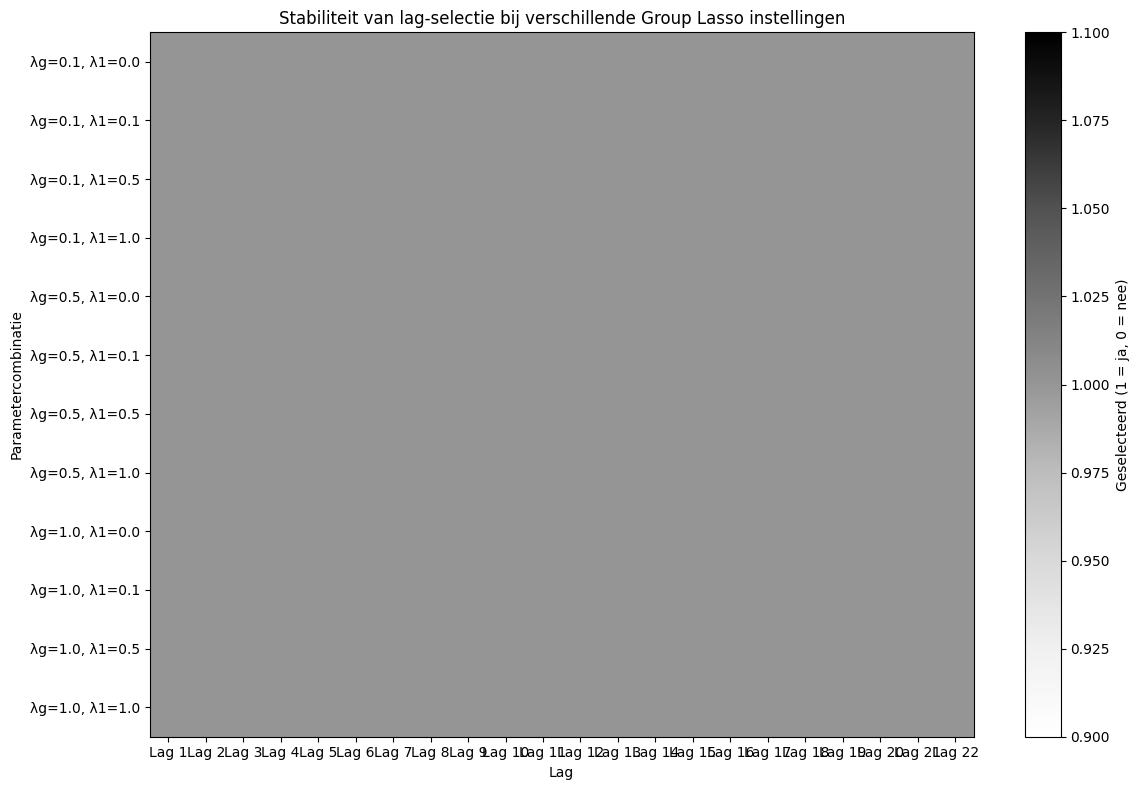

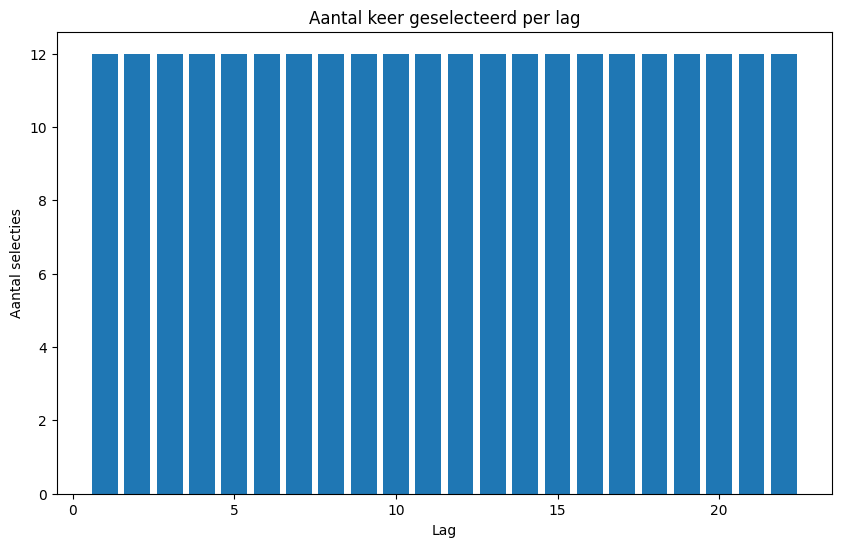

In [58]:
import numpy as np
import pandas as pd
from group_lasso import GroupLasso
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from itertools import product

# ⚙️ Parameters
max_lag = 22 #working days
cause_cols = ['All_C', 'All_HB', 'All_HI', 'All_I']
effect_cols = ['fraction_True', 'avg_duration']
df = stationary_df[cause_cols + effect_cols].dropna()

# 🔁 Lagged matrix bouwen
def create_lagged_input(df, cause_cols, effect_cols, max_lag):
    X_lagged, Y = [], []
    for t in range(max_lag, len(df)):
        lags = []
        for lag in range(1, max_lag + 1):
            lags.extend(df[cause_cols].iloc[t - lag].values)
        X_lagged.append(lags)
        Y.append(df[effect_cols].iloc[t].values)
    return np.array(X_lagged), np.array(Y)

X_lagged, Y = create_lagged_input(df, cause_cols, effect_cols, max_lag)

# 🔄 Normaliseren
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_lagged)

# 🎯 Group labels per lag (1 groep per blok)
n_causes = len(cause_cols)
groups = np.repeat(np.arange(max_lag), n_causes)

# 📐 Raster van hyperparameters
group_regs = [0.1, 0.5, 1.0]
l1_regs = [0.0, 0.1, 0.5, 1.0]
param_grid = list(product(group_regs, l1_regs))

# 📊 Resultaten opslaan
lag_matrix = np.zeros((len(param_grid), max_lag), dtype=int)
param_labels = []
lag_counts = np.zeros(max_lag, dtype=int)

print("🔍 Lag-selectie over (group_reg, l1_reg):")
for i, (group_reg, l1_reg) in enumerate(param_grid):
    model = GroupLasso(
        groups=groups,
        group_reg=group_reg,
        l1_reg=l1_reg,
        fit_intercept=True,
        supress_warning=True
    )
    model.fit(X_scaled, Y)
    selected_lags = np.unique(groups[np.any(model.coef_ != 0, axis=1)])
    for lag in selected_lags:
        lag_matrix[i, lag] = 1
        lag_counts[lag] += 1  # Count the number of times each lag is selected
    label = f"λg={group_reg}, λ1={l1_reg}"
    param_labels.append(label)
    print(f"{label} → geselecteerde lags: {selected_lags + 1 if len(selected_lags) > 0 else 'geen'}")

# 🥇 Select the top 5, 6, or 7 most frequent lags
top_5_lags = np.argsort(lag_counts)[-5:] + 1
top_6_lags = np.argsort(lag_counts)[-6:] + 1
top_7_lags = np.argsort(lag_counts)[-7:] + 1
print("\nTop 5 meest causale lags:", top_5_lags)
print("Top 6 meest causale lags:", top_6_lags)
print("Top 7 meest causale lags:", top_7_lags)

# 🖼️ Visualisatie als matrix
plt.figure(figsize=(12, len(param_grid) * 0.5 + 2))
plt.imshow(lag_matrix, cmap="Greys", aspect="auto")
plt.xticks(range(max_lag), [f"Lag {i+1}" for i in range(max_lag)])
plt.yticks(range(len(param_grid)), param_labels)
plt.xlabel("Lag")
plt.ylabel("Parametercombinatie")
plt.title("Stabiliteit van lag-selectie bij verschillende Group Lasso instellingen")
plt.colorbar(label="Geselecteerd (1 = ja, 0 = nee)")
plt.tight_layout()
plt.show()

# 📊 Plot most influential lags
plt.figure(figsize=(10, 6))
plt.bar(np.arange(1, max_lag+1), lag_counts)
plt.title("Aantal keer geselecteerd per lag")
plt.xlabel("Lag")
plt.ylabel("Aantal selecties")
plt.show()

In [60]:
from statsmodels.tsa.stattools import grangercausalitytests
import pandas as pd

# Kolommen
X_columns = ['All_C', 'All_HB', 'All_HI', 'All_I']
Y_columns = ['fraction_True', 'avg_duration']
selected_lags = [1,2,3,4,5] # Gebaseerd op Group Lasso-analyse

results = []

# Loop door alle combinaties van X ➡ Y
for x in X_columns:
    for y in Y_columns:
        try:
            data = stationary_df[[y, x]].dropna()
            test_result = grangercausalitytests(data, maxlag=max(selected_lags), verbose=False)

            result = {
                'X (cause)': x,
                'Y (effect)': y,
            }

            for lag in selected_lags:
                p_val = test_result[lag][0]['ssr_ftest'][1]
                result[f'p_lag{lag}'] = p_val

        except Exception as e:
            result = {'X (cause)': x, 'Y (effect)': y}
            for lag in selected_lags:
                result[f'p_lag{lag}'] = None

        results.append(result)

# Zet het in een DataFrame
granger_df_selected = pd.DataFrame(results)

# Bekijk de resultaten
from IPython.display import display
display(granger_df_selected)



/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print resul

,X (cause),Y (effect),p_lag1,p_lag2,p_lag3,p_lag4,p_lag5
0,All_C,fraction_True,0.464762,0.402753,1.491481e-02,2.998461e-02,2.392195e-04
1,All_C,avg_duration,0.005667,0.088819,3.546481e-03,9.285765e-05,9.703534e-07
2,All_HB,fraction_True,0.281079,0.515097,1.092993e-04,1.416910e-05,1.300841e-05
3,All_HB,avg_duration,0.000017,0.001158,9.752073e-06,1.124100e-08,3.520160e-08
4,All_HI,fraction_True,0.651741,0.901380,7.593725e-02,4.235022e-02,2.804043e-04
5,All_HI,avg_duration,0.001069,0.017353,3.044827e-03,5.009910e-05,1.178486e-07
6,All_I,fraction_True,0.783082,0.274980,6.045189e-07,6.816243e-07,2.073363e-06
7,All_I,avg_duration,0.000200,0.000044,3.035940e-14,6.367008e-13,3.416754e-10


In [61]:
# Functie om kleur te bepalen op basis van p-waarde
def color_pval(val):
    if pd.isna(val):
        return ''
    elif val < 0.05:
        return 'color: green'
    else:
        return 'color: red'

# Pas de stijl toe op de DataFrame
styled_df = granger_df_selected.style.applymap(
    color_pval,
    subset=[col for col in granger_df_selected.columns if col.startswith('p_lag')]
)

# Toon de gestylede DataFrame
display(styled_df)

/usr/local/lib/python3.11/dist-packages/cudf/pandas/fast_slow_proxy.py:28: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  return fn(*args, **kwargs)


,X (cause),Y (effect),p_lag1,p_lag2,p_lag3,p_lag4,p_lag5
0,All_C,fraction_True,0.464762,0.402753,0.014915,0.029985,0.000239
1,All_C,avg_duration,0.005667,0.088819,0.003546,0.000093,0.000001
2,All_HB,fraction_True,0.281079,0.515097,0.000109,0.000014,0.000013
3,All_HB,avg_duration,0.000017,0.001158,0.000010,0.000000,0.000000
4,All_HI,fraction_True,0.651741,0.901380,0.075937,0.042350,0.000280
5,All_HI,avg_duration,0.001069,0.017353,0.003045,0.000050,0.000000
6,All_I,fraction_True,0.783082,0.274980,0.000001,0.000001,0.000002
7,All_I,avg_duration,0.000200,0.000044,0.000000,0.000000,0.000000


In [62]:
from statsmodels.tsa.stattools import grangercausalitytests
import pandas as pd

# Kolommen
Y_columns = ['All_C', 'All_HB', 'All_HI', 'All_I']
X_columns = ['fraction_True', 'avg_duration']
selected_lags = [1,2,3,4,5] # Gebaseerd op Group Lasso-analyse

results = []

# Loop door alle combinaties van X ➡ Y
for x in X_columns:
    for y in Y_columns:
        try:
            data = stationary_df[[y, x]].dropna()
            test_result = grangercausalitytests(data, maxlag=max(selected_lags), verbose=False)

            result = {
                'X (cause)': x,
                'Y (effect)': y,
            }

            for lag in selected_lags:
                p_val = test_result[lag][0]['ssr_ftest'][1]
                result[f'p_lag{lag}'] = p_val

        except Exception as e:
            result = {'X (cause)': x, 'Y (effect)': y}
            for lag in selected_lags:
                result[f'p_lag{lag}'] = None

        results.append(result)

# Zet het in een DataFrame
granger_df_selected = pd.DataFrame(results)

# Bekijk de resultaten
from IPython.display import display
display(granger_df_selected)


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print resul

,X (cause),Y (effect),p_lag1,p_lag2,p_lag3,p_lag4,p_lag5
0,fraction_True,All_C,0.000227,0.000017,0.000021,0.000010,0.000011
1,fraction_True,All_HB,0.750875,0.255559,0.050036,0.008802,0.014321
2,fraction_True,All_HI,0.009871,0.000587,0.000557,0.000104,0.000011
3,fraction_True,All_I,0.261588,0.315709,0.295147,0.000252,0.001021
4,avg_duration,All_C,0.900578,0.857271,0.360054,0.025737,0.000902
5,avg_duration,All_HB,0.571881,0.257781,0.904069,0.837759,0.886502
6,avg_duration,All_HI,0.257363,0.868894,0.669501,0.124751,0.001653
7,avg_duration,All_I,0.910958,0.078225,0.001732,0.127529,0.002168


In [63]:
# Functie om kleur te bepalen op basis van p-waarde
def color_pval(val):
    if pd.isna(val):
        return ''
    elif val < 0.05:
        return 'color: green'
    else:
        return 'color: red'

# Pas de stijl toe op de DataFrame
styled_df = granger_df_selected.style.applymap(
    color_pval,
    subset=[col for col in granger_df_selected.columns if col.startswith('p_lag')]
)

# Toon de gestylede DataFrame
display(styled_df)

/usr/local/lib/python3.11/dist-packages/cudf/pandas/fast_slow_proxy.py:28: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  return fn(*args, **kwargs)


,X (cause),Y (effect),p_lag1,p_lag2,p_lag3,p_lag4,p_lag5
0,fraction_True,All_C,0.000227,0.000017,0.000021,0.000010,0.000011
1,fraction_True,All_HB,0.750875,0.255559,0.050036,0.008802,0.014321
2,fraction_True,All_HI,0.009871,0.000587,0.000557,0.000104,0.000011
3,fraction_True,All_I,0.261588,0.315709,0.295147,0.000252,0.001021
4,avg_duration,All_C,0.900578,0.857271,0.360054,0.025737,0.000902
5,avg_duration,All_HB,0.571881,0.257781,0.904069,0.837759,0.886502
6,avg_duration,All_HI,0.257363,0.868894,0.669501,0.124751,0.001653
7,avg_duration,All_I,0.910958,0.078225,0.001732,0.127529,0.002168
